In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score



In [6]:

# -----------------------------
# Load dataset from file
# -----------------------------
data = pd.read_excel("./ML470_S5_Diabetes_Cleaned_Data_Concept.xlsx")

# Assume last column is target (0 = No Diabetes, 1 = Diabetes)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values



In [7]:

# -----------------------------
# Random Forest model
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=150,
    random_state=42,
    n_jobs=-1
)

cv = RepeatedStratifiedKFold(
    n_splits=10,
    n_repeats=3,
    random_state=42
)


In [8]:

# -----------------------------
# Cross-validated probability predictions
# -----------------------------
y_true_all = []
y_prob_all = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    rf.fit(X_train, y_train)
    probs = rf.predict_proba(X_test)[:, 1]

    y_true_all.extend(y_test)
    y_prob_all.extend(probs)

y_true_all = np.array(y_true_all)
y_prob_all = np.array(y_prob_all)


In [9]:

# -----------------------------
# ROC & AUC
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_true_all, y_prob_all)
auc_score = roc_auc_score(y_true_all, y_prob_all)

# -----------------------------
# Plot ROC Curve
# -----------------------------
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

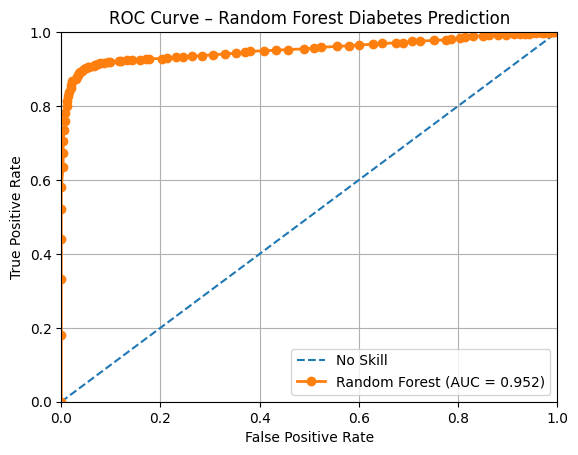

In [10]:

# No-skill baseline
plt.plot([0, 1], [0, 1], linestyle="--", label="No Skill")

# Random Forest ROC curve
plt.plot(
    fpr,
    tpr,
    marker="o",
    linewidth=2,
    label=f"Random Forest (AUC = {auc_score:.3f})"
)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest Diabetes Prediction")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.grid(True)

plt.show()
